In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle

In [2]:
data = pd.read_csv('https://raw.githubusercontent.com/prathameshks/ML-From-Scratch/main/MNIST_DATA/train.csv')

In [3]:
data = np.array(data)
m, n = data.shape
np.random.shuffle(data) # shuffle before splitting into test and training sets

data_test = data[0:1000].T
Y_test = data_test[0]
X_test = data_test[1:n]
X_test = X_test / 255.

data_train = data[1000:m].T
Y_train = data_train[0]
X_train = data_train[1:n]
X_train = X_train / 255.
_,m_train = X_train.shape

In [4]:
X_train.head()

AttributeError: 'numpy.ndarray' object has no attribute 'head'

In [ ]:
Y_train.head()

In [ ]:
print(f"{X_train.shape = }")
print(f"{X_test.shape = }")
print(f"{Y_train.shape = }")
print(f"{Y_test.shape = }")

X_train.shape = (784, 42000)
X_test.shape = (783, 28000)
Y_train.shape = (42000,)
Y_test.shape = (28000,)


In [13]:
class NeuralNetwork:
    def __init__(self):
        pass

    def init_params(self):
        self.w1 = np.random.rand(10, 784) - 0.5
        self.b1 = np.random.rand(10, 1) - 0.5
        self.w2 = np.random.rand(10, 10) - 0.5
        self.b2 = np.random.rand(10, 1) - 0.5
        return self.w1, self.b1, self.w2, self.b2

    def ReLU(self, x):
        return np.maximum(0, x)

    def softMax(self, x):
        return np.exp(x) / np.sum(np.exp(x))

    def forward_prop(self, X):
        z1 = self.w1.dot(X) + self.b1
        a1 = self.ReLU(z1)
        z2 = self.w2.dot(a1) + self.b2
        a2 = self.softMax(z2)

        return z1,a1,z2,a2

    def one_hot(self,y):
        one_hot_y = np.zeros((y.size , y.max() + 1))
        one_hot_y[np.arange(y.size) , y] = 1
        one_hot_y = one_hot_y.T
        return one_hot_y

    def deriv_ReLU(self,x):
        return x>0

    def back_prop(self, z1, a1, z2, a2,x, y):
        one_hot_y = self.one_hot(y)
        dz2 = a2-one_hot_y
        dw2 = 1/ m * dz2.dot(a1.T)
        db2 = 1 / m * np.sum(dz2)

        dz1 = self.w2.T.dot(dz2) * self.deriv_ReLU(z1)
        dw1 = 1 / m * dz1.dot(x.T)
        db1 = 1 / m * np.sum(dz1)

        return dw1,db1,dw2,db2

    def update_params(self, dw1,db1,dw2,db2,alpha):
        self.w1 = self.w1 - alpha*dw1
        self.b1 = self.b1 - alpha*db1
        self.w2 = self.w2 - alpha*dw2
        self.b2 = self.b2 - alpha*db2

    def get_predictions(self, a2):
        return np.argmax(a2, 0)

    def get_accuracy(self, predictions, y):
        print(predictions, y)
        return np.sum(predictions == y) / y.size

    def gradient_decent(self,x,y,iterations,alpha):
        self.init_params()
        for i in range(iterations):
            z1,a1,z2,a2 = self.forward_prop(x)
            dw1,db1,dw2,db2 = self.back_prop(z1,a1,z2,a2,x,y)
            self.update_params(dw1,db1,dw2,db2,alpha)
            if(i % 50 == 0):
                print("Iteration: ",i)
                predictions = self.get_predictions(a2)
                print("Accuracy: ",self.get_accuracy(predictions,y))
    

    def make_predictions(self,x):
        _,_,_,a2 = self.forward_prop(x)
        predictions = self.get_predictions(a2)
        return predictions

    def show_training_predictions(self,index,x,y):
        cur_img = x[:,index,None]
        prediction = self.make_predictions(cur_img)
        print("Prediction: ", prediction)
        print("Label: ", y[index])
        cur_img = cur_img.reshape((28,28))
        plt.imshow(cur_img, cmap='gray')
        plt.show()

    def save(self,file):
        np.savez(file, w1=self.w1, b1=self.b1, w2=self.w2, b2=self.b2)
        
    def load(self,file):
        npz = np.load(file)
        self.w1 = npz['w1']
        self.b1 = npz['b1']
        self.w2 = npz['w2']
        self.b2 = npz['b2']

In [15]:
# get testing accuracy

def get_accuracy(predictions, y):
    print(predictions, y)
    return np.sum(predictions == y) / y.size


In [14]:
model = NeuralNetwork()
model.gradient_decent(X_train, Y_train, 1000, 0.01)


<ipython-input-13-3c63550f4d24>:16: RuntimeWarning: overflow encountered in exp
  return np.exp(x) / np.sum(np.exp(x))
<ipython-input-13-3c63550f4d24>:16: RuntimeWarning: invalid value encountered in divide
  return np.exp(x) / np.sum(np.exp(x))


Iteration:  0
[0 5 0 ... 5 0 0] [1 0 1 ... 7 6 9]
Accuracy:  0.07859523809523809
Iteration:  50
[0 0 0 ... 0 0 0] [1 0 1 ... 7 6 9]
Accuracy:  0.09838095238095237
Iteration:  100
[0 0 0 ... 0 0 0] [1 0 1 ... 7 6 9]
Accuracy:  0.09838095238095237
Iteration:  150
[0 0 0 ... 0 0 0] [1 0 1 ... 7 6 9]
Accuracy:  0.09838095238095237
Iteration:  200
[0 0 0 ... 0 0 0] [1 0 1 ... 7 6 9]
Accuracy:  0.09838095238095237
Iteration:  250
[0 0 0 ... 0 0 0] [1 0 1 ... 7 6 9]
Accuracy:  0.09838095238095237
Iteration:  300
[0 0 0 ... 0 0 0] [1 0 1 ... 7 6 9]
Accuracy:  0.09838095238095237
Iteration:  350
[0 0 0 ... 0 0 0] [1 0 1 ... 7 6 9]
Accuracy:  0.09838095238095237
Iteration:  400
[0 0 0 ... 0 0 0] [1 0 1 ... 7 6 9]
Accuracy:  0.09838095238095237
Iteration:  450
[0 0 0 ... 0 0 0] [1 0 1 ... 7 6 9]
Accuracy:  0.09838095238095237
Iteration:  500
[0 0 0 ... 0 0 0] [1 0 1 ... 7 6 9]
Accuracy:  0.09838095238095237
Iteration:  550
[0 0 0 ... 0 0 0] [1 0 1 ... 7 6 9]
Accuracy:  0.09838095238095237
Iterati

In [21]:
# test accuracy
predictions = model.make_predictions(X_train)
print("Accuracy: ",get_accuracy(predictions,Y_train))

[0 0 0 ... 0 0 0] [1 0 1 ... 7 6 9]
Accuracy:  0.09838095238095237


Prediction:  [0]
Label:  7


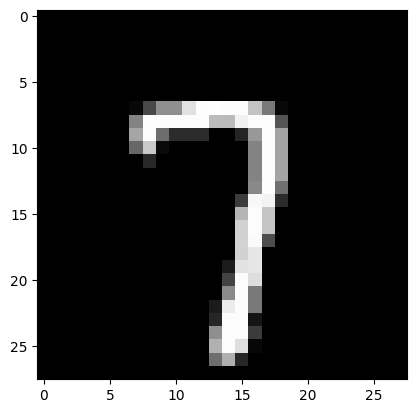

In [12]:
model.show_training_predictions(103,X_train,Y_train)